#Introduction to Data Science - 22KDL Lab 04: KMeans Clustering:
**Name:** Phan Văn Hoàng <br>
**ID:** 22280033 <br>
**Class:** 22KDL1


##**Problem Statement**:
###Introduction:
The objective of this report is to deepen the understanding of the K-Means
clustering algorithm by implementing it from scratch using object-oriented programming (OOP).

## **Import Libraries**

All lbiraries needed for KMeans Clustering are in code below

In [581]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.cluster import KMeans as SklearnKMeans
from sklearn.metrics import silhouette_score, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

## **Data description:**


In [582]:
import pandas as pd
import numpy as np

# Loading dataset
df_college = pd.read_csv('College.csv')

The dataset, named `df_college`, contains information on  US Colleges from the 1995 issue of US News and World Report, with 777 observations on the following 18 variables. Each column within this dataset is described as follows:
1. `Private`: A factor with levels No and Yes indicating private or public university
2. `Apps`: Number of applications received
3. `Accept`: Number of applications accepted
4. `Enroll`: Number of new students enrolled
5. `Top10perc` Pct. new students from the top 10% of H.S. class
6. `Top25perc`: Pct. new students from the top 25% of H.S. class
7. `F.Undergrad`: Number of full-time undergraduates
8. `P.Undergrad`: Number of part-time undergraduates
9. `Outstate`: Out-of-state tuition
10. `Room.Board`: Room and board costs
11. `Books`: Estimated book costs
12. `Personal`: Estimated personal spending
13. `PhD`: Pct. of faculty with Ph.D.’s
14. `Terminal`: Pct. of faculty with a terminal degree
15. `S.F.Ratio`: Student/faculty ratio
16. `perc.alumni`: Pct. alumni who donate

In [583]:
#Showing the features names from dataset 1
df_college.keys()

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [584]:
df_college = df_college.rename(columns = {'Unnamed: 0':'College/University'})
df_college.keys()

Index(['College/University', 'Private', 'Apps', 'Accept', 'Enroll',
       'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate',
       'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio',
       'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

To gain a deeper understanding of the dataset, we utilized the `info()`,`head()`,`shape` and `describe()` functions in Python's `pandas` library. These functions provide valuable insights into the dataset's structure, the initial rows of data, the dimensions of the dataset and offer valuable insights into the numerical variables in the dataset.

In [585]:
#Getting information of dataset 1
df_college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   College/University  777 non-null    object 
 1   Private             777 non-null    object 
 2   Apps                777 non-null    int64  
 3   Accept              777 non-null    int64  
 4   Enroll              777 non-null    int64  
 5   Top10perc           777 non-null    int64  
 6   Top25perc           777 non-null    int64  
 7   F.Undergrad         777 non-null    int64  
 8   P.Undergrad         777 non-null    int64  
 9   Outstate            777 non-null    int64  
 10  Room.Board          777 non-null    int64  
 11  Books               777 non-null    int64  
 12  Personal            777 non-null    int64  
 13  PhD                 777 non-null    int64  
 14  Terminal            777 non-null    int64  
 15  S.F.Ratio           777 non-null    float64
 16  perc.alu

In [586]:
#Getting the first 5 rows of the dataset 1
df_college.head()

,College/University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [587]:
#Print the dimensions of the dataset 1
df_college.shape

(777, 19)

In [588]:
#Print the summary statistic of the dataset 1
df_college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


##**Data Preprocessing:**

### Encode categorical features

As part of the data preprocessing steps, we extracted a list of column names corresponding to categorical features present in the dataset. This allows us to identify and distinguish categorical variables from numerical ones.


In [589]:
#Get the datatype of dataset 1
data_types_1 = df_college.dtypes

# Get the categorical features (select columns with the data types are 'object' or 'category' and convert the features names to the list)
categorical_features_1 = data_types_1[data_types_1 == 'object'].index.tolist()
categorical_features_1.extend(data_types_1[data_types_1 == 'category'].index.tolist())

# Print the list of categorical features
print("Categorical Features from dataset:", categorical_features_1)

Categorical Features from dataset: ['College/University', 'Private']


Before encoding, we looked at the number of categories in both dataset 1 and 2.

In [590]:
# Dataset 1 (geography)
np.unique(df_college.Private)

array(['No', 'Yes'], dtype=object)

For better implement KMeans, we drop `df_college.College/University` column and encode `df_college.Private` categorcal column utilizing label encoding. That means we set `Yes` for 1 and `No` for 0.

In [591]:
df_college = df_college.drop(columns = 'College/University')
df_college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [592]:
df_college.replace(
    {
        'Yes' : 1,
        'No' : 0
    },
    inplace= True
)
df_college

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,1,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,1,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


### Handling missing values

To ensure the integrity and reliability of the dataset, we will identify any missing values present in the dataset using `isnull()`.

In [593]:
# Check missing values in dataset
df_college.isnull().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

**Conclusion:** There are no missing values in dataset.

### Removing outliers

In this step, outliers were identified and removed using the Z-score method. Data points with a Z-score greater than 3 or less than -3 were considered outliers, and were consequently removed all numerical columns. <br>
The Z-score is calculated using the formula:
$$\text{Z-score} = \dfrac{\text{value}-\text{mean}}{\text{standard deviation}}$$
where `value` represents the data point, `mean` is the mean of the dataset, and `standard deviation` is the standard deviation.

**Dataset 1:** <br>


In [594]:
df_college.shape

(777, 18)

In [595]:
#Removing outliers from dataset 1

for column in df_college.columns:
    upper_limit = 3 * df_college[column].std() + df_college[column].mean()
    df_college = df_college[df_college[column] <= upper_limit]

In [596]:
df_college.shape

(642, 18)

### Data normalization for numerical features

**Apply scaling:**

We seperated the

 In this stage, we will employ the `MinMaxScaler` method from the `sklearn.preprocessing` library to fit and transform our data, ensuring that numerical features are normalized to a specified range. <br>
 The `MinMaxScaler` is calculated using the formula:
 $$X_\text{scaled} = \dfrac{X - X_\text{min}}{X_\text{max} - X_\text{min}} $$
Where:
*   $X$ is the original feature value.
*   $X_\text{min}$ is the minimum feature value in the dataset.
*   $X_\text{max}$ is the maximum feature value in the dataset.
*   $X_\text{scaled}$ is the rescaled feature value within the range $[0,1]$.






In [597]:
#Normalizing data from dataset
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on the training data and transform numerical features
df_scaled = scaler.fit_transform(df_college)

df_college_scaled = pd.DataFrame(df_scaled, columns = df_college.columns)
df_college_scaled.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1.0,0.109790,0.161380,0.267030,0.282051,0.477778,0.241853,0.149428,0.254184,0.270463,0.391593,0.684211,0.645161,0.710526,0.739336,0.206897,0.195487,0.555556
1,1.0,0.146364,0.257652,0.185675,0.192308,0.222222,0.224062,0.341790,0.507322,0.830961,0.723451,0.438596,0.204301,0.078947,0.459716,0.275862,0.372262,0.511111
2,1.0,0.093659,0.142599,0.117166,0.269231,0.455556,0.079003,0.027321,0.453452,0.350534,0.336283,0.321053,0.462366,0.552632,0.492891,0.517241,0.281389,0.488889
3,1.0,0.023363,0.038536,0.039704,0.756410,0.888889,0.032676,0.017285,0.542887,0.653025,0.391593,0.219298,0.881720,0.960526,0.246445,0.637931,0.802738,0.544444
4,1.0,0.007788,0.010295,0.007785,0.192308,0.388889,0.009688,0.241985,0.260460,0.416370,0.778761,0.438596,0.709677,0.631579,0.445498,0.034483,0.392292,0.055556


### Correlation Analysis

Before clustering the data, we need to check that our features are not correlated.

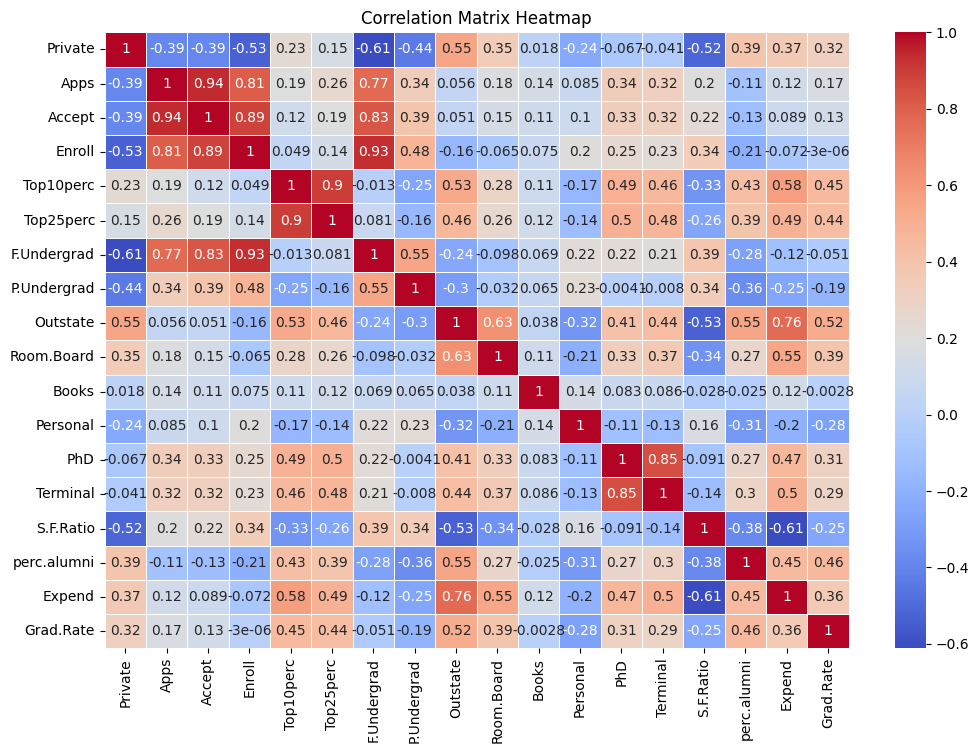

In [598]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_college_scaled.corr(),annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Becuase highly correlated features can introduce redundancy into the dataset, potentially affecting the performance of KMeans clustering algorithm. Removing one of the correlated features can help mitigate this issue and improve cluster separation.

In [599]:
# Identify highly correlated features
correlation_matrix = df_college_scaled.corr().abs()
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
      if correlation_matrix.iloc[i, j] > 0.9:
          colname = correlation_matrix.columns[i]
          highly_correlated_features.add(colname)

# Remove highly correlated features
df_college_scaled = df_college_scaled.drop(columns=highly_correlated_features)

In [600]:
df_college_scaled.shape

(642, 16)

## **Implement KMeans**

To implement the KMeans algorithm, we begin by modifying the dataset to facilitate the clustering process. Specifically, we add two columns:

1. **`Cluster`**: This column keeps track of the cluster index assigned to each data point.
2. **`minDist`**: This column stores the minimum distance from each data point to the centroid of its assigned cluster.


In [601]:
df_college_scaled['Cluster'] = -1
df_college_scaled['minDist'] = float('inf')

After that, we implement KMeans clustering from scratch by defining a Python class named `KMeans`. This class has several parameters and attributes that help manage the clustering process. Here is a detailed breakdown of the implementation

**Parameters**
1. `k`: The number of clusters to form.
2. `convergence`: The convergence tolerance, which determines when the algorithm should stop iterating.
3. `max_iter_`: The maximum number of iterations the algorithm will run if it does not converge before.

**Attributes**
1. `cluster_centers_`: Coordinates of the cluster centers. If the algorithm stops before fully converging (see convergence and max_iter_), these will not be consistent with labels_.
2. `labels_`: Labels of each point, indicating the cluster each point belongs to.
3. `n_iter_`: Number of iterations run.
4. `inertia_`: Sum of squared distances of samples to their closest cluster center.

**Methods**
1. `fit`: This method takes in the dataset, initializes the cluster centers, assigns data points to the nearest cluster, computes the centroids of clusters, and repeats the process until convergence or the maximum number of iterations is reached.
2. `transform`: This method calculates the distances of each data point to each cluster center.
3. `predict`: This method assigns each data point to the nearest cluster center based on the current cluster centers.
4. `fit_transform`: This method combines the fitting process and then transforms the data by computing the distances to the cluster centers.
5. `fit_predict`: This method combines the fitting process and then predicts the clusters for the data points.

The KMeans algorithm begins with the following steps <br>
1. **Initialize the Clusters**: <br>
Ee randomly select k points which become `markers`, then assign each datapoint to its nearest marker point. The result of this is k clusters.
2. **Compute the Centroid of Each Cluster**:
3. **Assign Each Point to the Nearest Centroid and Redefine the Clusters**:
4. **Repeat Steps 2 and 3**: <br>
Repeat the process of computing centroids and reassigning data points until the centroids no longer change significantly (convergence) or the maximum number of iterations is reached.

In [602]:
class KMeans():
  def __init__(self, k, convergence, max_iter_):
        self.k = k
        self.convergence = convergence
        self.max_iter_ = max_iter_
        self.cluster_centers_ = pd.DataFrame()
        self.labels = []
        self.n_iter_ = 0
        self.inertia_ = 0

  # Fit method
  def fit(self, df_college_scaled):
    #Add 'Cluster' and 'minDist' column to data
    df_college_scaled['Cluster'] = -1
    df_college_scaled['minDist'] = float('inf')

    # Randomly initialize cluster centers
    self.cluster_centers_ = pd.DataFrame(df_college_scaled.sample(n = self.k))

    prev_cluster_centers_change = float('inf')

    while self.n_iter_ <= self.max_iter_:
      self.inertia_ = 0  # Reset inertia
      # Assign each point to the nearest cluster center
      for i, (index, row_centers) in enumerate(self.cluster_centers_.iterrows(), start = 0):
        cluster_centers_id = i

        for j, row_df in df_college_scaled.iterrows():
          dist = np.linalg.norm(row_centers.values[:-2] - row_df.values[:-2])
          if dist < row_df['minDist']:
            df_college_scaled.at[j, 'minDist'] = dist
            df_college_scaled.at[j, 'Cluster'] = cluster_centers_id  # Update the cluster assignment

      for i in df_college_scaled['minDist']:
        self.inertia_ += i ** 2  # Accumulate squared distance for inertia

      # Initialize number of data points in each cluster
      n_points_clusters = [0] * self.k
      # Initialize the sum of points in each cluster
      total_sum = {col:{cluster_id:0 for cluster_id in range(0,self.k)} for col in df_college_scaled.columns}


      # Calculate the sum of points and count of points in each cluster
      for row_df in df_college_scaled.values:
        cluster_id = int(row_df[-2])
        n_points_clusters[cluster_id] += 1
        for i,col in enumerate(row_df):
          total_sum[df_college_scaled.columns[i]][cluster_id] += col
        row_df[-1] = float('inf') # Reset the distance

      # Create a new dataframe to hold the new cluster centers
      new_cluster_centers_ = self.cluster_centers_.copy()

      # Update the cluster centers
      for cluster_id, (index, new_row_centers) in enumerate(new_cluster_centers_.iterrows(), start=0):
         for col in df_college_scaled.columns:
           new_cluster_centers_.at[index, col] = total_sum[col][cluster_id] / n_points_clusters[cluster_id]

      # Calculate the change in cluster centers
      cluster_centers_change = 0
      for (_, row_centers), (_, new_row_centers) in zip(self.cluster_centers_.iterrows(), new_cluster_centers_.iterrows()):
        cluster_centers_change += np.linalg.norm(row_centers.values[:-2] - new_row_centers.values[:-2])

      # Check convergence
      if cluster_centers_change < self.convergence:
        break

      # Update the cluster centers and iteration count
      self.cluster_centers_ = new_cluster_centers_
      prev_cluster_centers_change = cluster_centers_change
      self.n_iter_+= 1

    # Assign final labels
    self.labels = np.array(df_college_scaled['Cluster']).reshape(1, -1)
    self.labels = self.labels.flatten()
    return self


  # transform method
  def transform(self, df):
   distances = np.zeros((df.shape[0], self.k))
   for i, (index, row_centers) in enumerate(self.cluster_centers_.iterrows()):
      for j, row_df in df.iterrows():
                distances[j, i] = np.linalg.norm(row_centers.values - row_df.values)
   return distances

   # predict method
  def predict(self, df):
    self.labels = []  # Clear labels before predicting
    for j, row_df in df.iterrows():
        min_dist = float('inf')
        cluster_id = -1
        for i, (index, row_centers) in enumerate(self.cluster_centers_.iterrows()):
            dist = np.linalg.norm(row_centers.values - row_df.values)
            if dist < min_dist:
                min_dist = dist
                cluster_id = i
        self.labels.append(cluster_id)
    self.labels = np.array(self.labels).reshape(1, -1)  # Reshape to a single row array
    return self.labels

   # fit_transform method
  def fit_transform(self, df):
    self.fit(df)
    return self.transform(df)

   # fit_predict method
  def fit_predict(self, df):
    self.fit(df)
    return self.predict(df)


## **Testing and Validation**

To test the custom KMeans class, we compare the results with sklearn's KMeans implementation by examining the coordinates of the cluster centers, the labels of each point, the number of iterations run, the sum of squared distances (inertia) and silhouette score.

First, we set fit the custom KMeans model and the sklearn KMeans model with the number of cluster is 3, convergence tolerance is 0.001 and the maximum number of iterations is 100

In [603]:
# Fit the custom KMeans model
custom_km = KMeans(k = 3, convergence = 0.001, max_iter_ = 100)
custom_km.fit(df_college_scaled)

In [604]:
# Fit the sklearn KMeans model
sklearn_km = SklearnKMeans(n_clusters = 3, tol = 0.001, max_iter = 100)
sklearn_km.fit(df_college_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=100, n_clusters=3, tol=0.001)

Then we compared the results of 2 KMeans models

**Cluster centers**

In [605]:
print("Custom KMeans Cluster Centers:\n", custom_km.cluster_centers_)
print("Sklearn KMeans Cluster Centers:\n", sklearn_km.cluster_centers_)

Custom KMeans Cluster Centers:
      Private      Apps    Enroll  Top10perc  Top25perc  P.Undergrad  Outstate  \
629      1.0  0.134055  0.170837   0.427923   0.626346     0.089278  0.554510   
494      0.0  0.229623  0.363492   0.227395   0.437009     0.293506  0.192163   
449      1.0  0.061035  0.098009   0.202541   0.360449     0.130375  0.344688   

     Room.Board     Books  Personal       PhD  Terminal  S.F.Ratio  \
629    0.544392  0.482936  0.307483  0.751801  0.821215   0.475334   
494    0.320188  0.471946  0.436241  0.674590  0.723387   0.703132   
449    0.399782  0.471508  0.347539  0.507892  0.547682   0.537284   

     perc.alumni    Expend  Grad.Rate  Cluster   minDist  
629     0.520145  0.393523   0.723826        0  0.517828  
494     0.240472  0.171114   0.499666        1  0.596326  
449     0.333676  0.223654   0.541641        2  0.490797  
Sklearn KMeans Cluster Centers:
 [[1.00000000e+00 1.34055026e-01 1.70836795e-01 4.27923165e-01
  6.26345934e-01 8.92781014e-02

**Labels**

In [606]:
print("Custom KMeans Labels:\n", custom_km.labels)
print("Sklearn KMeans Labels:\n", sklearn_km.labels_)

Custom KMeans Labels:
 [0 2 2 0 2 0 0 0 0 2 0 0 0 0 2 2 2 2 1 1 2 0 1 0 2 0 2 0 2 2 0 2 0 2 0 0 0
 0 2 0 1 2 2 0 0 2 2 2 2 0 0 1 2 2 2 0 2 2 2 0 0 0 0 0 2 0 0 0 2 2 0 0 2 0
 2 0 0 1 2 0 0 2 2 0 0 1 1 2 0 0 0 0 2 1 2 0 0 2 0 1 0 0 0 0 0 1 2 0 2 0 0
 0 0 2 2 2 0 0 1 0 0 0 2 2 2 2 0 0 0 0 2 2 2 2 2 0 2 1 0 0 0 1 0 2 2 0 2 0
 0 0 0 1 2 2 1 1 2 2 0 0 0 0 2 2 0 1 0 0 1 0 1 2 2 0 2 2 0 1 1 2 0 2 2 0 0
 2 2 2 2 0 2 0 2 0 0 0 2 0 2 2 1 2 2 2 0 0 0 0 2 0 0 2 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 2 2 2 2 0 0 0 0 2 0 2 0 1 2 1 2 0 1 2 0 2 1 2 0 2 0 0 0 2 0 2 0 2
 2 1 0 0 0 0 0 2 0 2 2 1 0 2 1 1 2 0 1 0 0 0 0 0 0 2 1 0 2 2 2 0 0 1 2 0 0
 0 2 0 1 0 2 2 0 2 2 1 2 2 2 0 2 0 2 0 1 1 2 0 0 2 2 1 1 1 2 0 2 1 1 1 2 1
 0 0 2 2 0 2 2 2 2 0 2 0 0 2 0 1 0 2 0 1 1 2 0 1 1 2 0 1 0 1 1 1 2 2 2 2 0
 0 0 0 2 2 0 0 2 0 2 0 1 1 2 2 2 2 2 0 2 2 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 2 0 2 2 2 0 0 1 1 2 2 0 1 2 2 0 2 0 0 0 2 2 0 0 2 2 0 2 0 1 0 0 0 2 0 0 0
 0 0 1 0 0 2 0 0 2 0 0 1 1 1 2 1 0 2 1 2 2 0 2 0 2 0 0 0 0 2 0 1 0 0 2 2 2
 0

**Sum of squared distances**

In [607]:
print("Custom KMeans Inertia:\n", custom_km.inertia_)
print("Sklearn KMeans Inertia:\n", sklearn_km.inertia_)

Custom KMeans Inertia:
 194.99592151475022
Sklearn KMeans Inertia:
 229.31674655789408


**Number of iterations**

In [608]:
print("Custom KMeans Iterations:\n", custom_km.n_iter_)
print("Sklearn KMeans Iterations:\n", sklearn_km.n_iter_)

Custom KMeans Iterations:
 3
Sklearn KMeans Iterations:
 2


**Silhouette score**

In [609]:
print("Custom KMeans Silhouette Score:\n", silhouette_score(df_college_scaled, custom_km.labels))
print("Sklearn KMeans Silhouette:\n", silhouette_score(df_college_scaled, sklearn_km.labels_))

Custom KMeans Silhouette Score:
 0.5446105856511412
Sklearn KMeans Silhouette:
 0.5446105856511412


After that, we use both `elbow method` and `silhouette score` to choose an optimal value for the number of clusters `k`.

**Silhouette score:** The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). This is then plotted against the number of the clusters.

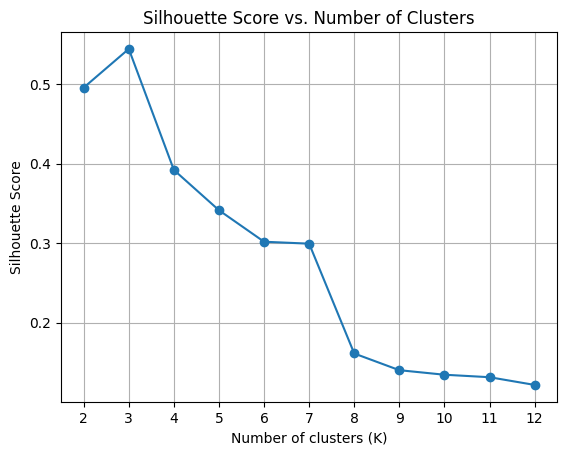

In [610]:
# Initialize a range of K values
k_range = range(2, 13)

# Initialize lists to store silhouette scores
silhouette_scores = []

for k in k_range:
    km = SklearnKMeans(n_clusters = k, random_state=42, n_init = 20)
    km.fit(df_college_scaled)
    silhouette = silhouette_score(df_college_scaled, km.labels_)
    silhouette_scores.append(silhouette)

# Plot silhouette scores
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.xticks(k_range)
plt.show()

**Elbow method:** The elbow method computes the sum of squared distances of the data point to the center of the cluster. This is then plotted against the number of the clusters.

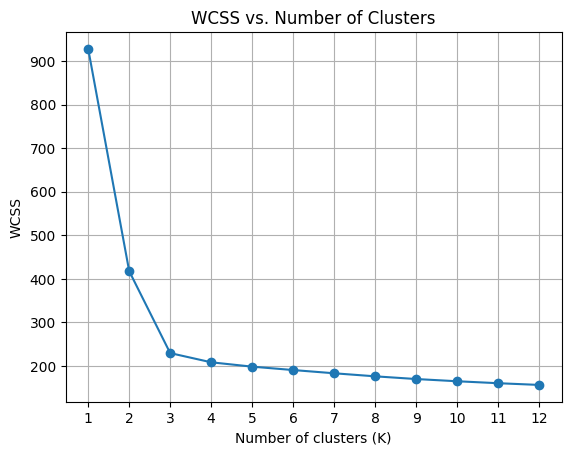

In [611]:
# Initialize a range of K values
k_range = range(1, 13)

# Initialize lists to store silhouette scores
wcss = []

for k in k_range:
    km = SklearnKMeans(n_clusters = k, random_state=42, n_init = 20)
    km.fit(df_college_scaled)
    wcss.append(km.inertia_)

plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.title('WCSS vs. Number of Clusters')
plt.grid(True)
plt.xticks(k_range)
plt.show()

**Conclusion:** Based on the elbow method and silhouette score, we choose $k=3$
 as the optimal number of clusters.

### **Compare the results of custom K-means and the Sklearn K-means with the Private attribute in the dataset:**

In [612]:
# Fit custom model KMeans with no 'Private' column
custom_km_1 = KMeans(k = 2, convergence = 0.001, max_iter_ = 100)
custom_km_1.fit(df_college_scaled.drop(columns = ['Private']))

#Fit sklearn model KMeans with no 'Private' column
sklearn_km_1 = SklearnKMeans(n_clusters = 2, tol = 0.001, max_iter= 100)
sklearn_km_1.fit(df_college_scaled.drop(columns = ['Private']))

df_private = pd.DataFrame(df_college_scaled['Private'])
df_private['Custom_Cluster'] = custom_km_1.labels
df_private['Sklearn_Cluster'] = sklearn_km_1.labels_
df_private.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Private,Custom_Cluster,Sklearn_Cluster
0,1.0,0,1
1,1.0,0,0
2,1.0,0,0
3,1.0,1,1
4,1.0,0,0


**Evaluate metrics:**

**Confusion Matrix**

To evaluate the clustering results by comparing the Private attribute with the labels generated by the custom KMeans and Sklearn KMeans models, we can use a confusion matrix. This allows us to assess how well the clustering algorithm has identified the clusters compared to the ground truth provided by the Private attribute.

In [613]:
# Calculate Confusion Matrix with 'Private' and 'Custom_Cluster'
confusion_custom = confusion_matrix(df_private['Private'], df_private['Custom_Cluster'])
confusion_custom


array([[119,  14],
       [248, 261]])

In [614]:
# Calculate Confusion Matrix with 'Private' and 'Sklearn_Cluster'
confusion_sklearn = confusion_matrix(df_private['Private'], df_private['Sklearn_Cluster'])
confusion_sklearn

array([[132,   1],
       [218, 291]])

Text(627.9949494949494, 0.5, 'Private')

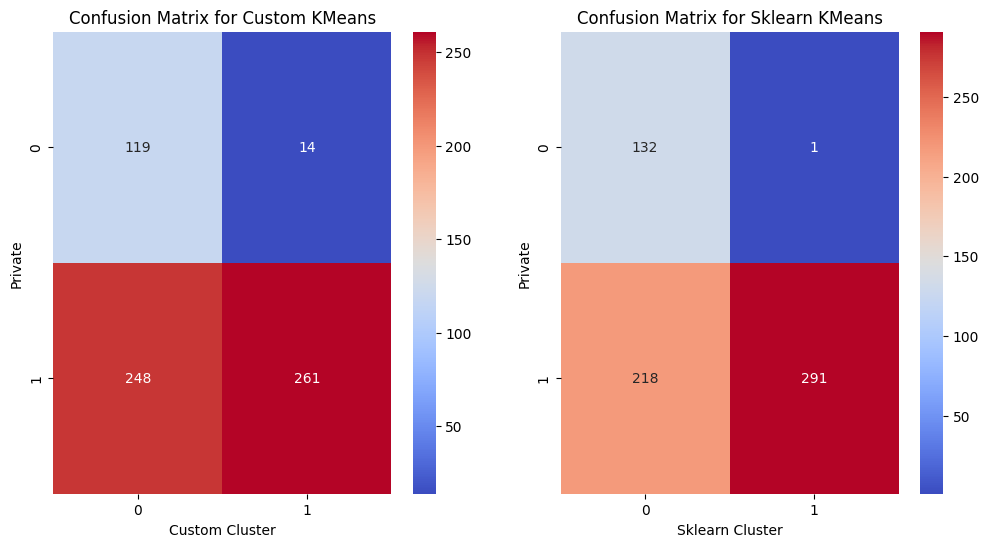

In [615]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(confusion_custom, annot=True, fmt="d", cmap="coolwarm", ax=axes[0])
axes[0].set_title('Confusion Matrix for Custom KMeans')
axes[0].set_xlabel('Custom Cluster')
axes[0].set_ylabel('Private')

sns.heatmap(confusion_sklearn, annot=True, fmt="d", cmap="coolwarm", ax=axes[1])
axes[1].set_title('Confusion Matrix for Sklearn KMeans')
axes[1].set_xlabel('Sklearn Cluster')
axes[1].set_ylabel('Private')

In addition, we calculate the accuracy score, which quantifies the proportion of correct predictions made by the clustering algorithms.

In [616]:
# Calculate accuracy scores
accuracy_custom = accuracy_score(df_private['Private'], df_private['Custom_Cluster'])
print('Accuracy score between Private and Custom_Cluster is: ',accuracy_custom)
accuracy_sklearn = accuracy_score(df_private['Private'], df_private['Sklearn_Cluster'])
print('Accuracy score between Private and Sklearn_Cluster is: ',accuracy_sklearn)

Accuracy score between Private and Custom_Cluster is:  0.5919003115264797
Accuracy score between Private and Sklearn_Cluster is:  0.6588785046728972


## **Analysis and Interpretation**

In [622]:
km = SklearnKMeans(n_clusters = 3)
#Fit model with 2 clusters
km.fit(df_college_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

Our dataset comprises 18 features, resulting in 18-dimensional data, we cannot graph the clusters in a 2D space. To address this, we employed Principal Component Analysis (PCA) to reduce the dimensionality of the data to two principal components.

In [623]:
pca = PCA(n_components = 2)
reduce_data = pca.fit_transform(df_college_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=reduce_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = km.labels_

# Transform the cluster centers into the PCA space
cluster_centers_pca = pca.transform(km.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


After applying PCA, we visualized the two principal components with separate clusters. We colored the predicted labels onto the first two principal components, allowing us to assess whether our algorithm effectively identifies a separation between clusters. This visualization helps in understanding the clustering structure and evaluating the performance of our K-means algorithm.

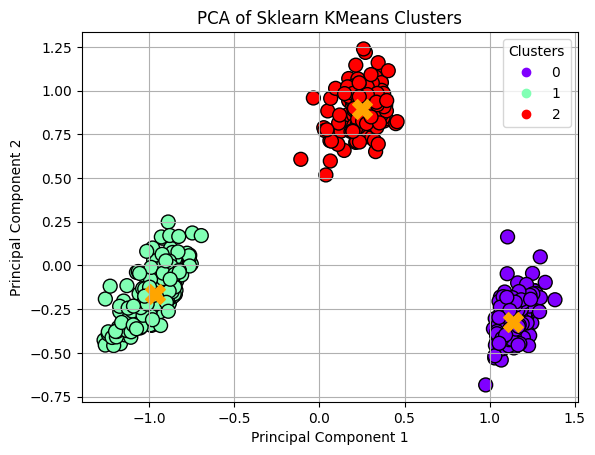

In [624]:
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='rainbow', marker='o',edgecolors='k', s=100)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='orange', s=200,  marker='X', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Sklearn KMeans Clusters')
plt.grid(True)
plt.show()

To illustrate how clustering groups similar data points together, we use pairplots of the features. In the pairplot, different features are plotted against each other and color-coded by their identified cluster. This visualization allows us to observe how groups of data points that are close together generally fall within the same cluster, confirming the effectiveness of our clustering algorithm.
We choose first 5 feature to illustrate this.

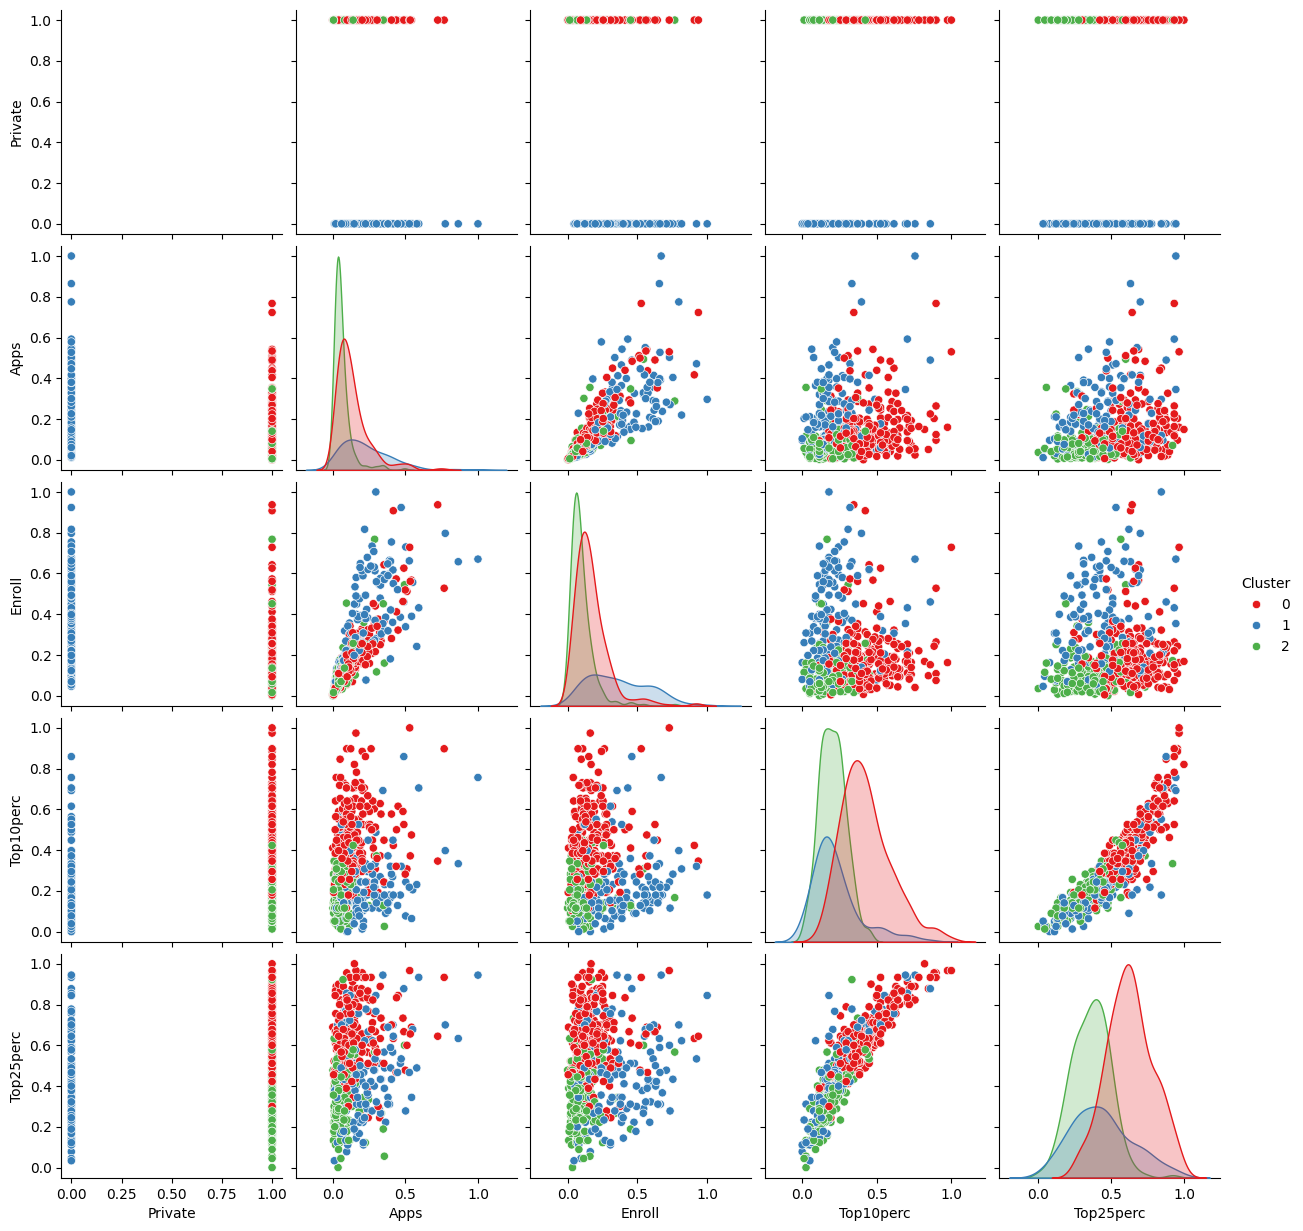

In [625]:
# Choose the first 5 features
selected_features = df_college_scaled.columns[:5].tolist()

# Create a new dataframe with the selected features and the cluster labels
subset_df = df_college_scaled[selected_features + ['Cluster']]

# Create the pairplot
sns.pairplot(subset_df, hue='Cluster', palette='Set1')
plt.show()

##**Conclusion**

In summary, KMeans clustering is the fastest and most efficient algorithm for categorizing data points into groups, even when very little information is available about the data. It works by iteratively assigning data points to the nearest cluster centers and recalculating the centers to minimize within-cluster variance.